In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
def C_converge(C_t,d,tau_ss,F):
    while True:

        Kw = (4*C_t - 1)/(4*C_t - 4) + 0.615/C_t

        C_p = tau_ss*np.pi*d**2/(8*F*Kw)

        error = ((C_p-C_t)**2)**0.5

        C_t = (C_p+C_t)/2

        print(error)

        if error <= C_t*0.01:
            return C_t


In [37]:
# constantes

Su = 1250e6
Su_lim = 0.80
Su_vida_inf = 0.44
Sy_lim = 0.65
F_min = 250
F_max = 500
Fa = 125
Fm = 375
Fs = 1.1 * F_max
delta_p = 25e-3
G = 79e9
E = 207e9
rho = 7700


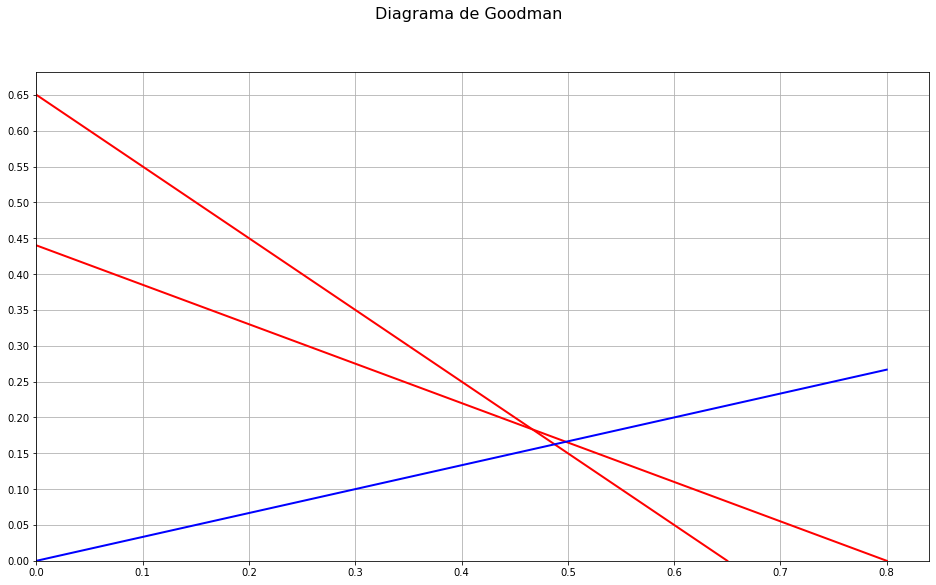

In [38]:
# plotagem diagrama de goodman

fig = plt.figure(figsize=[16, 9])
fig.suptitle('Diagrama de Goodman', fontsize=16)

linha_sobrecarga_1 = np.array(
    ([0,Su_vida_inf],
    [Su_lim,0])
) 

linha_sobrecarga_2 = np.array(
    ([0,Sy_lim],
    [Sy_lim,0])
) 

linha_carga = np.array(
    ([0,0],
    [Su_lim,Su_lim/(Fm/Fa)])
)


# Plotando 2D

ax = fig.add_subplot(1, 1, 1)

ax.plot(linha_sobrecarga_1[:,0], linha_sobrecarga_1[:,1], 'r', linewidth=2)
ax.plot(linha_sobrecarga_2[:,0], linha_sobrecarga_2[:,1], 'r', linewidth=2)
ax.plot(linha_carga[:,0], linha_carga[:,1], 'b', linewidth=2)

ax.set_xlim(0)
ax.set_ylim(0)
ax.locator_params(axis='y', nbins=20)
ax.grid()

plt.show()


In [39]:
# encontrando tensão limite

tensao_max_teorico = 0.16 * Su

f_seguranca = 0.1

f_mola_solida = 0.1

tensao_max = tensao_max_teorico/(1+f_seguranca)/(1+f_mola_solida)
print('{:.2e} MPa'.format(tensao_max/1e6))

1.65e+02 MPa


In [40]:
# estabelecendo um diãmetro alvo

C_t = 10

Kw = (4*C_t - 1)/(4*C_t - 4) + 0.615/C_t

d_alvo = (8*F_max*C_t*Kw/(np.pi*tensao_max))**0.5

print('{:.2e} mm'.format(d_alvo*1e3))


9.39e+00 mm


In [41]:
# calculando contante de rigidez

k = (F_max-F_min)/delta_p

print('{:.2e} N/m'.format(k))


1.00e+04 N/m


In [47]:
# iterando diâmetros para achar a melhor solução

d_list = np.linspace(3e-3,18e-3,num=10)

C_list = []
D_list = []
Nt_list = []
Lf_D_list = []
delta_Lf_list = []

for d in d_list:

    C = C_converge(C_t,d,tensao_max,F_max)

    D = C * d

    N = d * G/(8 * C**3 * k)

    N_t = N + 2

    Ls = N_t * d

    delta = Fs/k

    L_f = Ls + delta

    Lf_D = L_f/D

    delta_Lf = delta/L_f

    C_list.append(C)
    D_list.append(D)
    Nt_list.append(N_t)
    Lf_D_list.append(Lf_D)
    delta_Lf_list.append(delta_Lf)

df = pd.DataFrame(np.vstack((
        d_list,
        C_list,
        D_list,
        Nt_list,
        Lf_D_list,
        delta_Lf_list
    )).T,columns=[
            'd',
            'C',
            'Nt',
            'Lf/D',
            'delta/Lf',
            'V'
        ])

df


8.979448911724319
4.595991176807038
2.448879671986356
1.4230361681536
0.9978808351008126
1.5178455820737748
0.01636222767003722
0.023471806540055654
0.03354198434915259
0.047717492118078714
0.06759067978144061
0.09558466653360659
0.13624169640573952
0.2013767385504074
0.3387625116848925
1.087285508777465
0.9817878745138445
2.087563351581442
1.1536471250106866
0.9907813047840364
1.4143946496663826
0.9846647447134107
1.8735751857044485
0.23090776679705882
0.45059204086718585
1.3240222460290219
9.122051747403244
2.5810216352634683
1.484426602477348
1.0159099815436012
1.3082115038062334
0.13982580008934062
0.20766001018395586
0.3555002298610779
1.305301399794141
0.9730721210989072
3.227445023044978
23.127028020108842
13.800105287952169
7.099850278315242
4.624386596128293
0.24564893925596243
0.47718266474904036
29.03584239253601
15.179813818516852
7.76053778192711
4.6385664594627745
0.10016877494037002
0.16129188275018363
0.28260677243644716
0.6013870948451344
2.547753577020802
4.6667527234

KeyboardInterrupt: 